<a href="https://colab.research.google.com/github/Noxscamp/CoderHouse/blob/main/Data_Storytelling2%2BMarin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   # ***Video Game Sales*** üéÆ

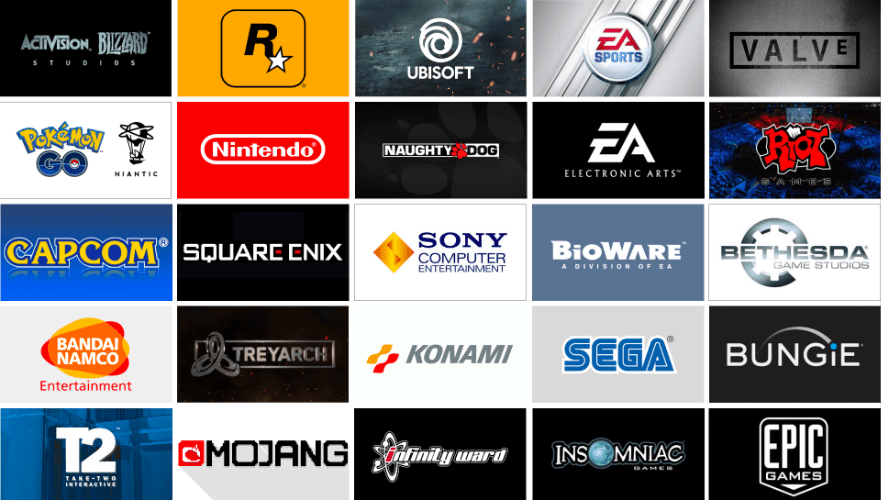


# Definici√≥n del objetivo
Con los datos hist√≥ricos que se posee acerca de los videojuegos, g√©neros, plataformas y ventas, buscamos obtener indicios que demuestren qu√© tipos de plataformas ser√°n las m√°s utilizadas a futuro y qu√© genero tendr√° mayor relevancia permitiendo desarrollar nueva informaci√≥n sobre futuras ventas.
# Contexto comercial
Debido al constante cambio tecnologico que vivimos, se ha producido un enorme desarrollo en los videojuegos, los cuales est√°n pr√≥ximos a simular nuestra realidad, lo cual nos benificiar√≠a a la hora de tomar desiciones, realizar ensayos o pruebas en dispositivos, entrenar a un piloto o una IA, dise√±ar y modificar estructuras previo a fabricarlas, etc permitiendo ahorrar costos y tiempo. Es por eso que las empresas m√°s importantes del mundo est√°n en la b√∫squeda de tecnolog√≠as como plataformas de videojuegos y simuladores que les permitan encontrar nuevas soluciones a sus servicios de forma m√°s inmersiva.
# Problema comercial
Se pretende contar con un modelo predictivo que ayude a tomar las desiciones correctas sobre el futuro de las plataformas y g√©neros m√°s relevantes de videojuegos.
# Contexto anal√≠tico
*Este conjunto de datos contiene una lista de videojuegos con ventas superiores a 100.000 copias.*

**Los campos incluyen:**

*   Rank: Ranking de ventas totales.

*   Name: Nombre del juego.
*   Plataform: PLataforma del juego.

*   Year: A√±o en la cual el juego se lanz√≥.

*   Genre: Genero del juego.

*   Publisher: Editor del juego.
*   NA_Sales: Ventas en Estados Unidos (Millones)


*   EU_Sales: Ventas en Europa (Millones)


*   JP_Sales: Ventas en Japon (Millones)

*   Other_Sales: Otras ventas (Millones)
*   Global_Sales: Total de ventas.


### ***Serie de preguntas***

*   ¬øCu√°l fue la relaci√≥n entre las ventas en Estados Unidos y el resto del mundo? 
*   ¬øCu√°l fue la relaci√≥n entre las ventas en Europa y el resto del mundo? 
*   ¬øCu√°l fue la relaci√≥n entre las ventas en Jap√≥n y el resto del mundo? 
*   ¬øCu√°les son los juegos mas vendidos?
*   ¬øCu√°les son los generos mas vendidos? 
*   ¬øCu√°l fue el formato de consola m√°s utilizado?
*   ¬øCu√°l fue el desarrollador que obtuvo m√°s ventas? 
*   ¬øCu√°l fue la evoluci√≥n entre las plataformas a lo largo de los a√±os? 

# ***Data Adquisition***

Llamo a las librerias potenciales a utilizar.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

In [2]:
url='https://raw.githubusercontent.com/leoomc97/datasets/main/vgsales.csv'
resp_vgsales=requests.get(url)
print(resp_vgsales)

<Response [200]>


In [3]:
vgsales = pd.read_csv(url)

In [4]:
df = pd.DataFrame(vgsales)
df

Rank                                              Name Platform  \
0          1                                        Wii Sports      Wii   
1          2                                 Super Mario Bros.      NES   
2          3                                    Mario Kart Wii      Wii   
3          4                                 Wii Sports Resort      Wii   
4          5                          Pokemon Red/Pokemon Blue       GB   
...      ...                                               ...      ...   
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597                     Men in Black II: Alien Escape       GC   
16595  16598  SCORE International Baja 1000: The Official Game      PS2   
16596  16599                                        Know How 2       DS   
16597  16600                                  Spirits & Spells      GBA   

         Year         Genre   Publisher  NA_Sales  EU_Sales  JP_Sales  \
0      2006.0        Sports    Nintendo     41.49     29.02      3.77   
1      1985.0      Platform    Nintendo     29.08      3.58      6.81   
2      2008.0        Racing    Nintendo     15.85     12.88      3.79   
3      2009.0        Sports    Nintendo     15.75     11.01      3.28   
4      1996.0  Role-Playing    Nintendo     11.27      8.89     10.22   
...       ...           ...         ...       ...       ...       ...   
16593  2002.0      Platform       Kemco      0.01      0.00      0.00   
16594  2003.0       Shooter  Infogrames      0.01      0.00      0.00   
16595  2008.0        Racing  Activision      0.00      0.00      0.00   
16596  2010.0        Puzzle    7G//AMES      0.00      0.01      0.00   
16597  2003.0      Platform     Wanadoo      0.01      0.00      0.00   

       Other_Sales  Global_Sales  
0             8.46         82.74  
1             0.77         40.24  
2             3.31         35.82  
3             2.96         33.00  
4             1.00         31.37  
...            ...           ...  
16593         0.00          0.01  
16594         0.00          0.01  
16595         0.00          0.01  
16596         0.00          0.01  
16597         0.00          0.01  

[16598 rows x 11 columns]

In [5]:
df.shape

(16598, 11)

# ***EDA - Exploratory Data Analysis üìä***

## ***1) Data Wrangling***

Comenzamos realizando la **preparaci√≥n de los datos**, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro an√°lisis, filtrar y ordenar el dataset as√≠ como eliminar datos y/o variables nulas y duplicadas.

###Borrado de duplicados

In [6]:
df = df.drop_duplicates()
print(df.shape)

(16598, 11)


###An√°lisis de nulos

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Text(0.5, 1.0, 'Matris de valores perdidos')

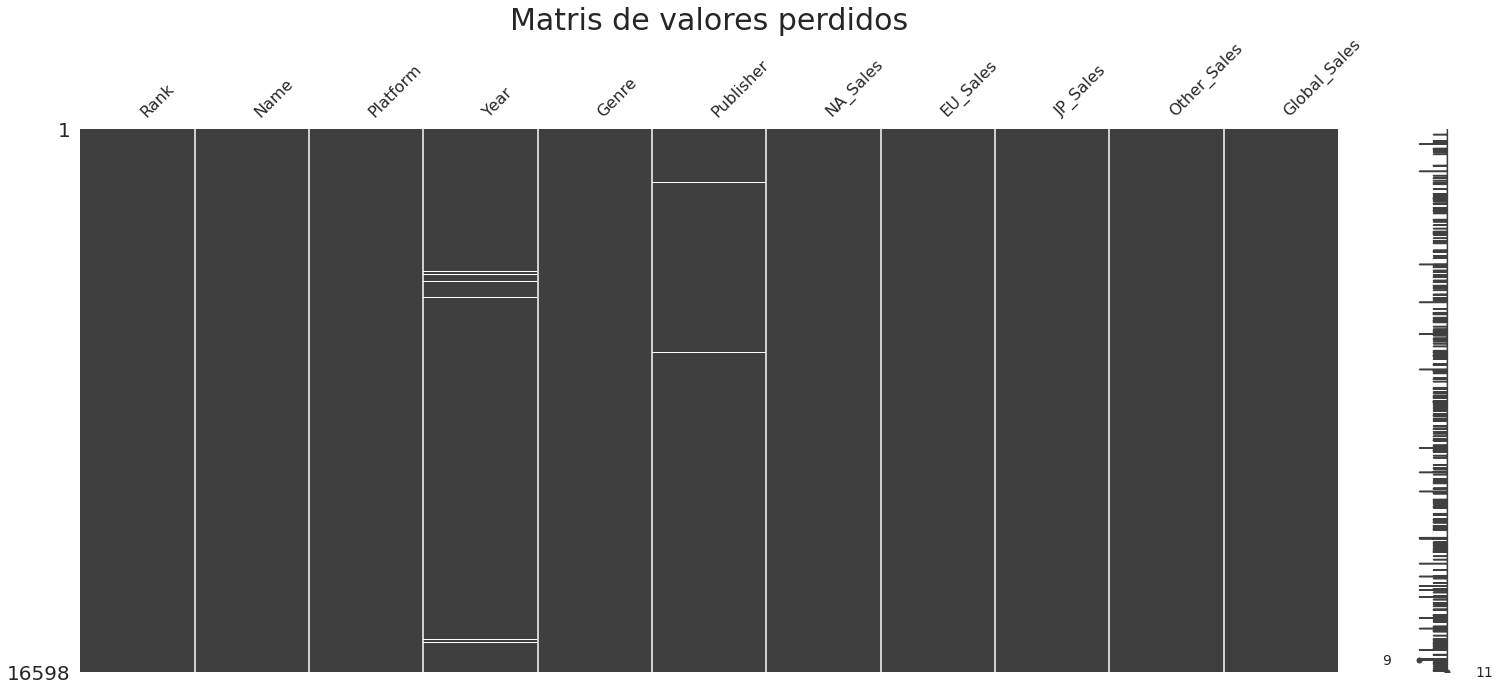

In [8]:
msno.matrix(df)
plt.title("Matris de valores perdidos",fontsize=30)

Podemos observar r√°pidamente que existen unos pocos datos nulos en las columnas "Year" y "Publisher".

In [9]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [10]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'Columnas': df.columns,
                                 'Porcentaje_Missing': percent_missing})
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False)

Columnas  Porcentaje_Missing
Year                  Year            1.632727
Publisher        Publisher            0.349440
Rank                  Rank            0.000000
Name                  Name            0.000000
Platform          Platform            0.000000
Genre                Genre            0.000000
NA_Sales          NA_Sales            0.000000
EU_Sales          EU_Sales            0.000000
JP_Sales          JP_Sales            0.000000
Other_Sales    Other_Sales            0.000000
Global_Sales  Global_Sales            0.000000

<Figure size 1080x360 with 0 Axes>

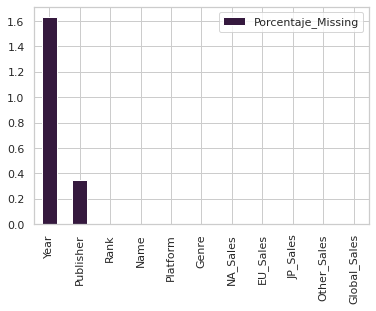

In [11]:
plt.figure(figsize=(15,5))
missing_value_df.sort_values(by=['Porcentaje_Missing'],ascending=False).plot(kind='bar')
plt.show()

Podemos deducir que la mayor parte de los datos nulos se encuentran en la variable "Year" con el 1,6% de los mismos, miertras que en la variable "Publisher" apenas alcanza 0,35% de datos nulos. Por lo tanto, concluimos que los datos nulos no tienen relevancia alguna para nuestro an√°lisis.

Con la informaci√≥n obtenida y los datos duplicados eliminados podemos comenzar a tomar decisiones sobre qu√© hacer con los datos nulos:

In [12]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

Decisi√≥n: Al tener muchos datos relevantes, solo eliminaremos aquellos datos que est√©n vacios.

In [13]:
df.Publisher.value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Warp                               1
New                                1
Elite                              1
Evolution Games                    1
UIG Entertainment                  1
Name: Publisher, Length: 578, dtype: int64

Decisi√≥n: Aplicar alguna t√©cnica de reemplazo por 'Desconocido'

####Llenar con la catergor√≠a "Desconocido"

In [14]:
col_cat=['Publisher'] #Columnas categ√≥ricas

#reemplazar con "Desconocido" en las columnas que est√©n vacias
for i in col_cat:
  df[i] = df[i].fillna('Desconocido')

df['Publisher'].value_counts().sum()

16598

In [15]:
df.shape

(16598, 11)

Podemos observar que la cantidad de datos de cada variable coinicide con la cantidad de filas del dataset, por lo tanto, no existen mas datos vac√≠os sino que se encuentran reemplazados por "Desconocido".

####Borrado de filas con datos nulos

In [16]:
df = df.dropna(axis=0)

In [17]:
df['Year'].isnull().sum()

0

Podemos observar que ya no hay datos nulos en ambas variables numericas.

###Transformo el tipo de dato de las columnas

Debido a que trabajaremos con a√±os, podemos utilizar variables enteras y no floats.

In [18]:
df["Year"] = df["Year"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


###Verifico las transformaciones realizadas en el dataset

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  int64  
 4   Genre         16327 non-null  object 
 5   Publisher     16327 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


Finalmente, separo un dataframe con valores actuales, desde el a√±o 2000 en adelante, que luego nos ser√° de utilidad.

In [20]:
df_new = df[df.Year >= 2000].sort_values("Year")
df_new

Rank                                              Name Platform  Year  \
8628    8630                              NCAA Final Four 2001       PS  2000   
4516    4518                                     TimeSplitters      PS2  2000   
8339    8341                       Turok 3: Shadow of Oblivion      N64  2000   
1185    1187                                    Smuggler's Run      PS2  2000   
8361    8363                            Nightmare Creatures II       PS  2000   
...      ...                                               ...      ...   ...   
15714  15717                                  This War of Mine      PS4  2016   
16241  16244  Phantasy Star Online 2 Episode 4: Deluxe Package      PSV  2017   
14390  14393  Phantasy Star Online 2 Episode 4: Deluxe Package      PS4  2017   
16438  16441                  Brothers Conflict: Precious Baby      PSV  2017   
5957    5959                            Imagine: Makeup Artist       DS  2020   

              Genre                     Publisher  NA_Sales  EU_Sales  \
8628         Sports   Sony Computer Entertainment      0.09      0.06   
4516        Shooter             Eidos Interactive      0.21      0.17   
8339        Shooter         Acclaim Entertainment      0.12      0.05   
1185         Racing          Take-Two Interactive      0.77      0.60   
8361         Action  Konami Digital Entertainment      0.09      0.06   
...             ...                           ...       ...       ...   
15714        Action                   Deep Silver      0.00      0.01   
16241  Role-Playing                          Sega      0.00      0.00   
14390  Role-Playing                          Sega      0.00      0.00   
16438        Action                  Idea Factory      0.00      0.00   
5957     Simulation                       Ubisoft      0.27      0.00   

       JP_Sales  Other_Sales  Global_Sales  
8628       0.00         0.01          0.16  
4516       0.00         0.06          0.43  
8339       0.00         0.00          0.17  
1185       0.00         0.20          1.56  
8361       0.00         0.01          0.17  
...         ...          ...           ...  
15714      0.00         0.00          0.02  
16241      0.01         0.00          0.01  
14390      0.03         0.00          0.03  
16438      0.01         0.00          0.01  
5957       0.00         0.02          0.29  

[14353 rows x 11 columns]

## ***2) Correlaciones y dependencias***

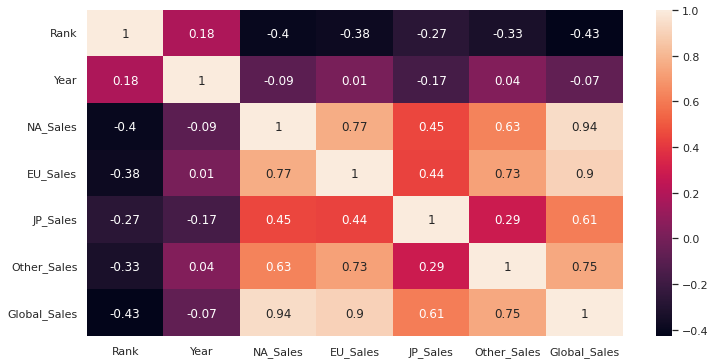

In [21]:
plt.figure(figsize=(12, 6))
sns.heatmap(np.round(df.corr(),2),annot=True)
plt.show()

Las ventas en Norte America, Europa y Jap√≥n influyen de manera significante en el resto del mundo, con una correlaci√≥n de 0.82, 0.64 y 0.73 respectivamente.

Sin embargo, no existe una gran correlaci√≥n entre las ventas de Norte America, Europa y Jap√≥n, seguramente porque los usuarios consumen distintos g√©neros o plataformas en esas regiones.

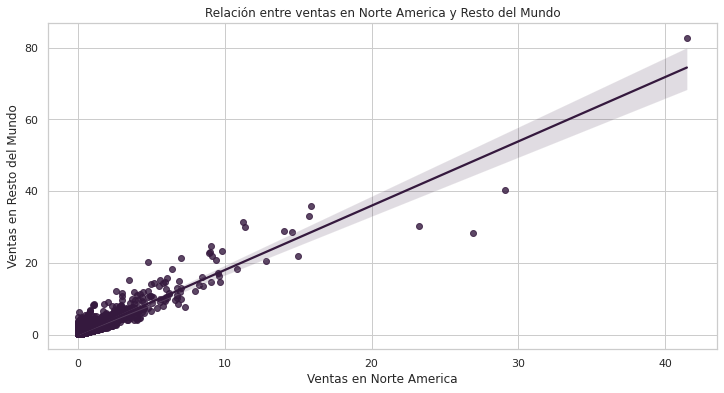

In [22]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Norte America')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relaci√≥n entre ventas en Norte America y Resto del Mundo')
plt.show()

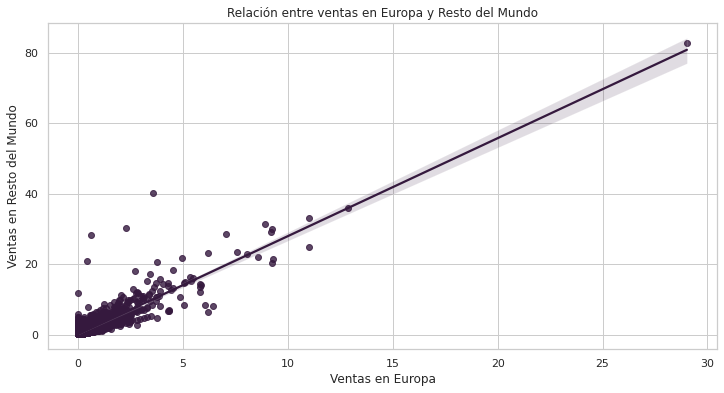

In [23]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['EU_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Europa')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relaci√≥n entre ventas en Europa y Resto del Mundo')
plt.show()

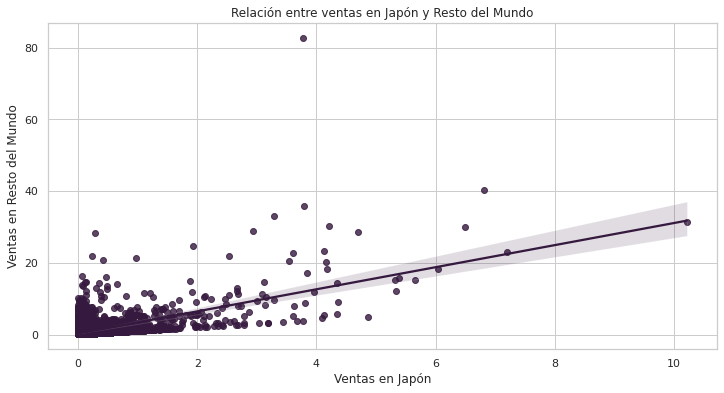

In [24]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['JP_Sales'],y=df['Global_Sales'])
plt.xlabel('Ventas en Jap√≥n')
plt.ylabel('Ventas en Resto del Mundo')
plt.title('Relaci√≥n entre ventas en Jap√≥n y Resto del Mundo')
plt.show()

Como podemos observar, existe una relaci√≥n lineal con respecto a la cantidad de ventas en Estados Unidos, Europa y Jap√≥n, y el Resto del Mundo. Es decir, a mayor cantidad de ventas en una de las 3 regiones mencionadas, tambi√©n crecen las ventas en el Resto del Mundo. Eso quiere decir, que cuando un g√©nero, plataforma o desarrollador tiene √©xito, tiene un alcance a todo el mundo y no s√≥lo a una regi√≥n.

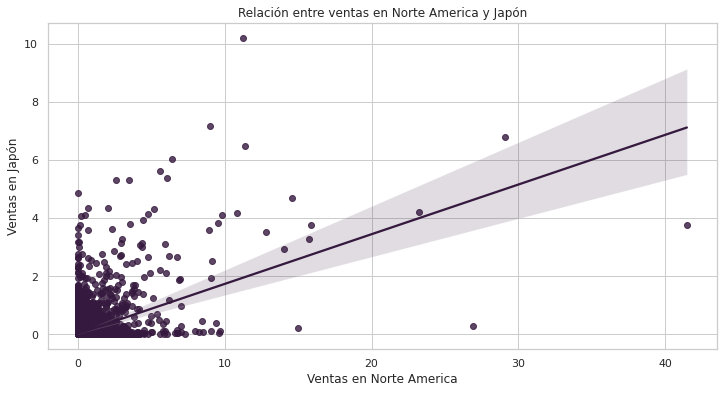

In [25]:
plt.figure(figsize=(12, 6))
sns.regplot(x=df['NA_Sales'],y=df['JP_Sales'])
plt.xlabel('Ventas en Norte America')
plt.ylabel('Ventas en Jap√≥n')
plt.title('Relaci√≥n entre ventas en Norte America y Jap√≥n')
plt.show()

Pero si observamos la relaci√≥n entre las ventas en Estados Unidos y Jap√≥n, se mantiene la hip√≥tesis anterior, donde a mayor cantidad de ventas en una regi√≥n, tambi√©n crecen las ventas en las otras regiones. Sin embargo, podemos notar una menor correlaci√≥n, seguramente por las diferentes culturas y consumo, donde Estados Unidos y Jap√≥n tienen inclinaci√≥n a distintos g√©neros y plataformas.

M√°s adelante podremos graficar y observar qu√© g√©neros y plataformas son las que m√°s se consumen en cada regi√≥n.

## ***3) An√°lisis Estad√≠stico***

Realizaremos una serie de preguntas e hipotesis sobre el dataset que intentaremos responder a traves de visualizaciones e interpretaciones de las mismas.

###An√°lisis descriptivo e inferencial de las variables historicas

####Feature: "Year"

Proporci√≥n de ventas por a√±o:

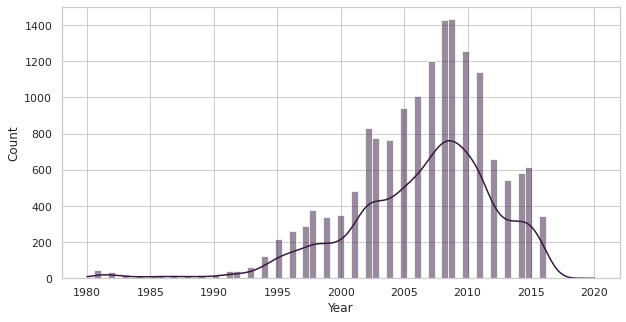

In [26]:
f, axs = plt.subplots(figsize=(10, 5))
ax = sns.histplot(x="Year", data=df,kde=True)
plt.show()

Se logra visualizar que existe un aumento en la cantidad de ventas de juegos con el paso de los a√±os, sin embargo, tambi√©n se logra identificar una ca√≠da en las ventas despu√©s del 2010, tal vez debido al aumento de precios o a la salida de nuevos servicios de gaming en la nube.

####Feature: "Platform"

Proporci√≥n de plataformas vendidas:

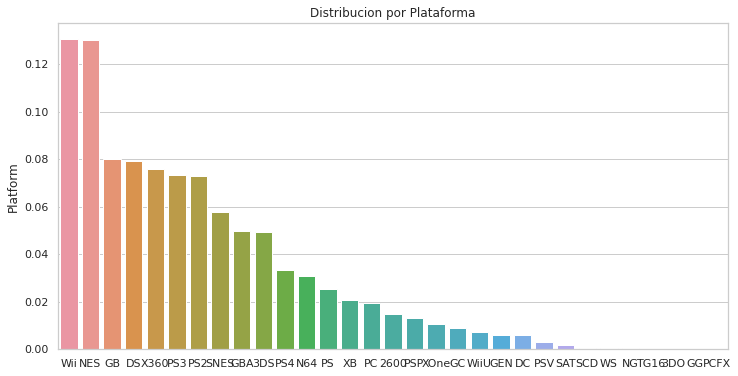

In [27]:
plt.figure(figsize=(12, 6))
x=df["Platform"].unique()
y=df["Platform"].value_counts()/df["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Se puede observar desde la perspectiva de las plataformas, un porcentaje considerable de ventas a lo largo de la historia de Nitendo con sus plataformas como la Nintendo wii, la Nintendo NES, la GameBoy y la Nintendo DS, dejando mucho m√°s atras a las conocidas Xbox y Play Station.

![texto del enlace](https://www.rosario3.com/export/sites/rosario3/img/2021/06/28/1624775678_021044_1624775732_sumario_normal.jpg_344325628.jpg)


####Feature: "Genre"

Proporci√≥n de g√©neros vendidos:

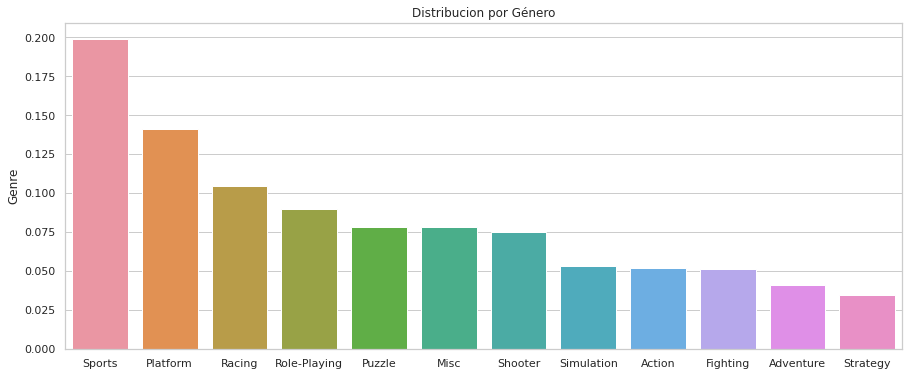

In [28]:
plt.figure(figsize=(15, 6))
x=df["Genre"].unique()
y=df["Genre"].value_counts()/df["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por G√©nero')
plt.show()

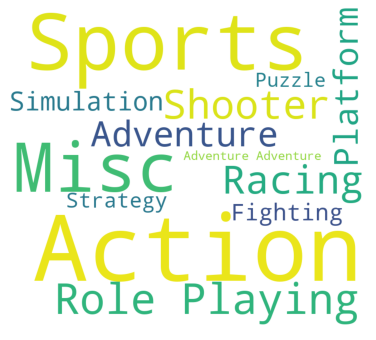

In [29]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Se puede observar que los g√©neros m√°s consumidos son Sports y PLataform alcanzando casi el 30% del mercado, mientras lo siguen los juegos de Racing y Role-Playing, y en menor medida Puzzle, seguidos para nuestra sorpresa por Simulaci√≥n, Adventure, Action,Shooter, Fighting, Strategy .

####Feature: "Publisher"

Proporci√≥n de desarrolladores con m√°s ventas:

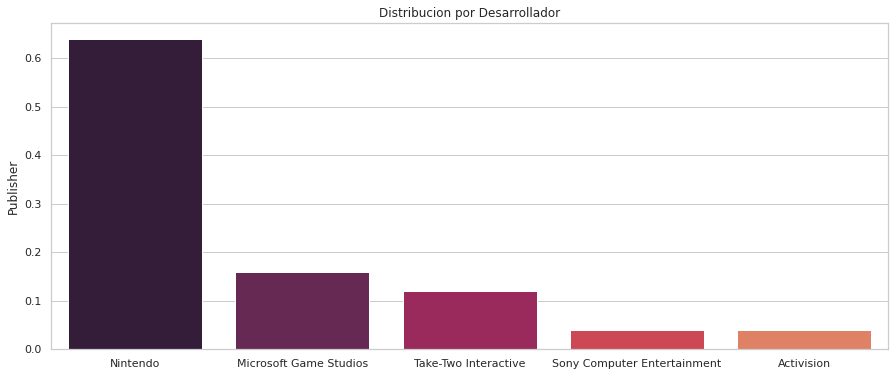

In [30]:
plt.figure(figsize=(15, 6))
x=df.head(50)["Publisher"].unique()
y=df.head(50)["Publisher"].value_counts()/df.head(50)["Publisher"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que el desarrollador que m√°s juegos ha vendido a lo largo de la historia fue Nintendo (As√≠ como tambi√©n comprobamos anteriormente que es el que m√°s plataformas ha ofrecido) con casi el 65% del mercado, seguido de Microsoft, Take-two, Sony y Activision.



---



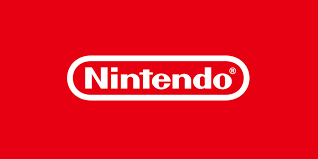







Proporci√≥n de desarrolladores con m√°s ventas en los √∫ltimos 20 a√±os:

####TOP 5 JUEGOS M√ÅS VENDIDOS HIST√ìRICOS

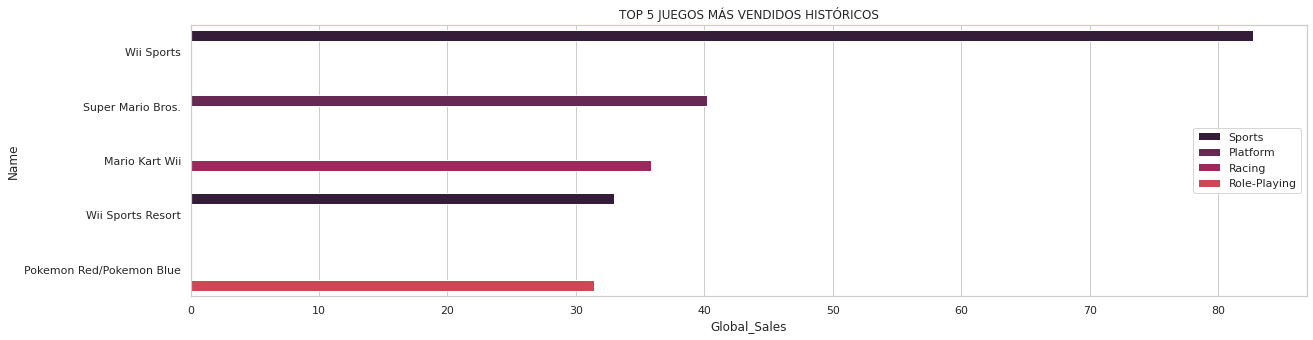

In [31]:
plt.figure(figsize=(20,5))
sns.barplot(y='Name',x='Global_Sales',hue='Genre',data=df.sort_values("Global_Sales", ascending=False).head(5)).set_title('TOP 5 JUEGOS M√ÅS VENDIDOS HIST√ìRICOS')
plt.legend()

Podemos observar que en el top 5 de ventas hist√≥ricas la alta demanda del genero Sports esto podemos comprobar debido a la dominacia en el historico vendido de Wii sports liderando el mismo y en 3er lugar con Wii Sports Resort. En el Top 5 tambien podemos encontrar cl√°sicos como Mario y Mario Kart wii con los juegos de Plataforma/Racing. Podemos notar tambi√©n el fuerte destacamento de los juegos de Role-Playing con los juegos de Pokemon, sin embargo, otros g√©neros como acci√≥n, shooter, Puzzle y aventura no han sido tan populares. 

Todos estos juegos lograron alcanzar un record entre 30 y 90 millones de ventas alrededor del mundo.

Recordemos tambi√©n que las plataformas con m√°s ventas que han acompa√±ado estos juegos han sido las ofrecidas por Nintendo durante los 80's, los 90's y los a√±os 2000.

###An√°lisis descriptivo e inferencial de las variables de la √∫ltima d√©cada

####Feature: "Platform"

Proporci√≥n de plataformas vendidas en los √∫ltimos 10 a√±os:

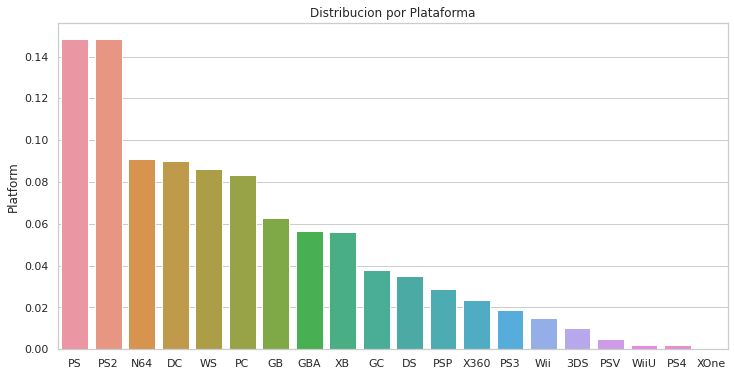

In [32]:
plt.figure(figsize=(12, 6))
x=df_new["Platform"].unique()
y=df_new["Platform"].value_counts()/df_new["Platform"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Plataforma')
plt.show()

Podemos notar que nuevas plataformas han aparecido la √∫ltima d√©cada, logrando llevarse casi el 20% de las ventas por parte de Sony con la Playstation y la Playstation 2, seguido de Nintendo con las N64 y su Nintendo DS obteniendo apenas entre el 5 el 7,5% del mercado. Podemos tambi√©n observar que aparece en este gr√°fico la opci√≥n de PC como plataforma de juegos gracias a los avances en procesadores y placas de video.

![texto del enlace](https://i.pinimg.com/originals/e0/bb/1a/e0bb1ae20f3a9e54a01f952a75e80def.jpg)

####Feature: "Genre"

Proporci√≥n de g√©neros vendidos en los √∫ltimos 10 a√±os:

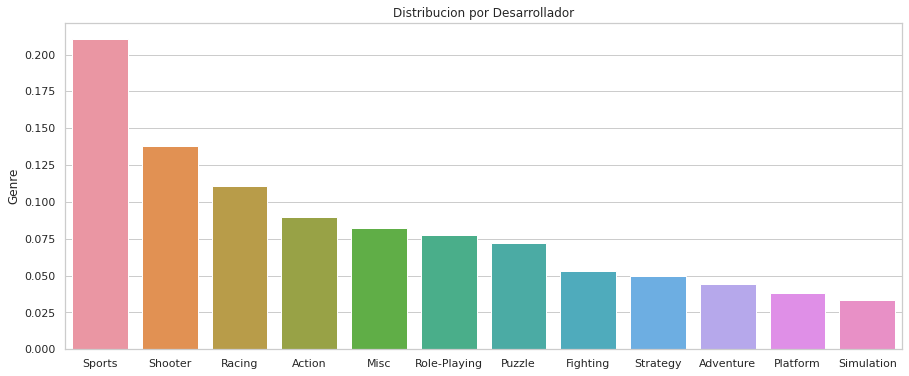

In [33]:
plt.figure(figsize=(15, 6))
x=df_new["Genre"].unique()
y=df_new["Genre"].value_counts()/df_new["Genre"].value_counts().sum()
ax=sns.barplot(x=x, y=y)
ax.set_title('Distribucion por Desarrollador')
plt.show()

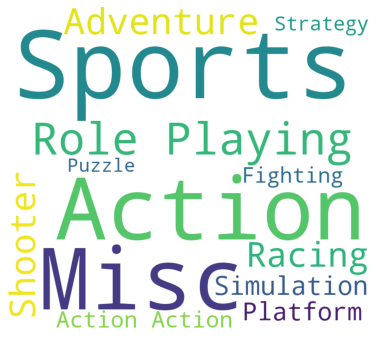

In [34]:
plt.subplots(figsize=(12,6))
wordcloud = WordCloud(background_color='White',width=800,height=720).generate(" ".join(df_new['Genre']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Podemos notar que los juegos de Sports han tomado mucha m√°s relevancia en las √∫ltimas d√©cadas logrando casi el 35% del mercado actual. El g√©nero de Role-Playing y simulation han ca√≠do a casi el 15% de las ventas del mercado, compitiendo directamente con los juegos de tipo Shooter, Acci√≥n y Racing que lograron tener una mayor popularidad al salir al mercado de la mano de las consolas de Playstation.

Es notable c√≥mo los juegos de Role-Playing han dejado de tener un gran consumo as√≠ como los juegos de tipo Puzzle.


####Feature: "Publisher"

Proporci√≥n de desarrolladores con m√°s ventas en los √∫ltimos 10 a√±os:

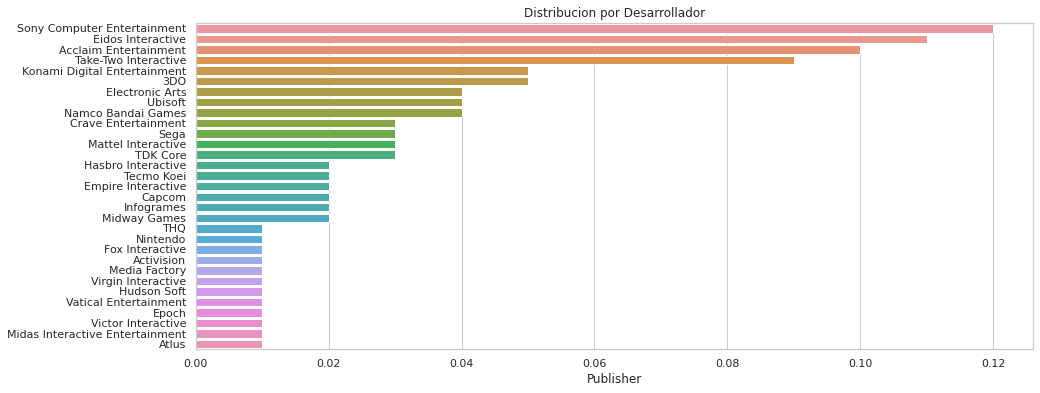

In [35]:
plt.figure(figsize=(15, 6))
x=df_new.head(100)["Publisher"].unique()
y=df_new.head(100)["Publisher"].value_counts()/df_new.head(100)["Publisher"].value_counts().sum()
ax=sns.barplot(x=y, y=x)
ax.set_title('Distribucion por Desarrollador')
plt.show()

Se puede observar que luego de los 2000 han aparecido una enorme variedad de desarrolladores de juegos y software, desatacando a Sony Computer Etertainment y Eidos interactive como proveedores de software y servicios a desarrolladores de juegos con el 20% del mercado, seguido de empresas m√°s conocidas en el ambiente gamer como Acclaim Entertainment, Take two, Konami y 3DO.

Con el aumento del consumo de juegos de acci√≥n y aventura, podemos intuir que vino de la mano de la nueva generaci√≥n de consolas como Playstation.

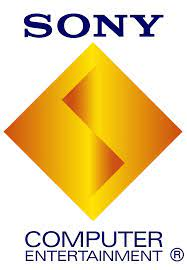







####TOP 5 JUEGOS M√ÅS VENDIDOS


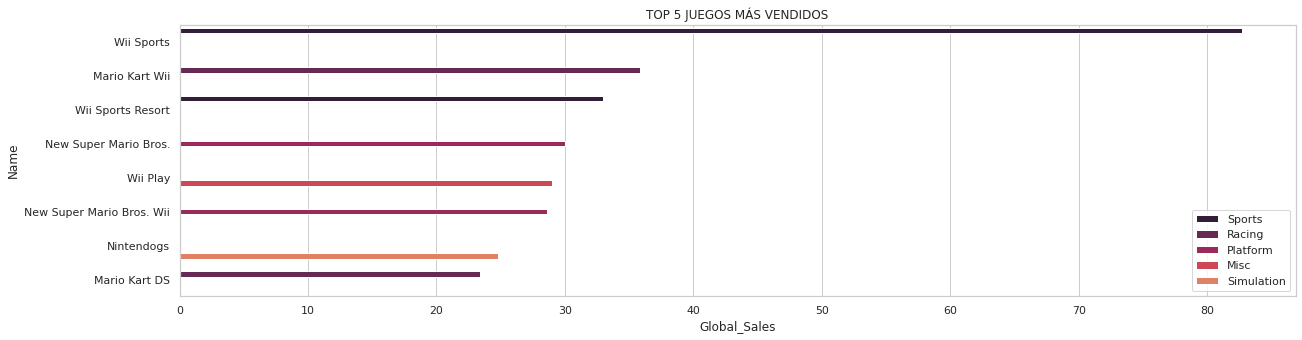

In [36]:
plt.figure(figsize=(20,5))
sns.barplot(y='Name',x='Global_Sales',hue='Genre',data=df_new.sort_values("Global_Sales", ascending=False).head(8)).set_title('TOP 5 JUEGOS M√ÅS VENDIDOS')
plt.legend()

Podemos observar que en el top 5 de ventas de la √∫ltima d√©cada que el g√©nero Sports ha superado a los dem√°s en ventas de forma considerable con mas de 80 millones de ventas, siendo acompa√±ado por los juegos de tipo Racing y Plataform. Liderando el Top 5 podemos encontrar grandes juegos como Wii Sports, Mario Kart Wii, Wii Sports resort, New Super Mario Bros, Wii Play, New super Mario Bros Wii, Nintendogs y Mario Kart Ds.

Todos estos juegos lograron alcanzar un record entre 25 y 85 millones de ventas alrededor del mundo.

Se puede observar la dominancia de Nintedo liderando el Top 5 de ventas en la ultima decada

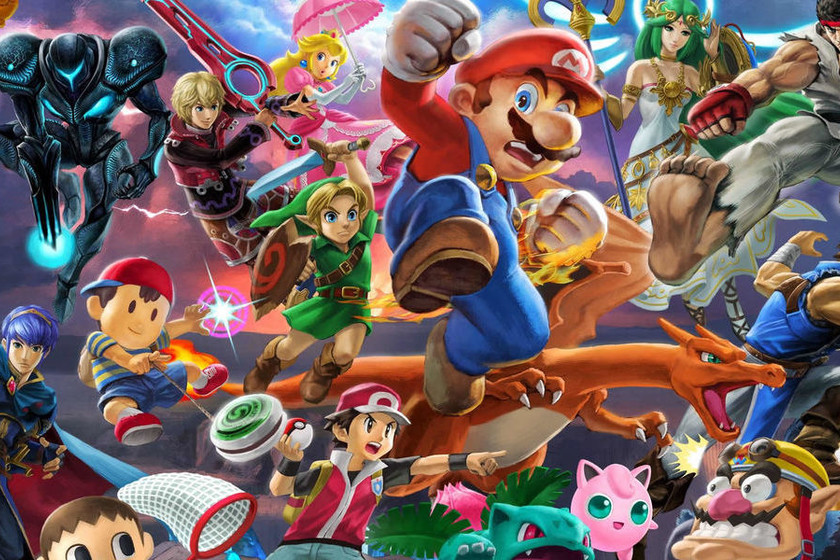

###Evoluci√≥n de las plataformas en el tiempo

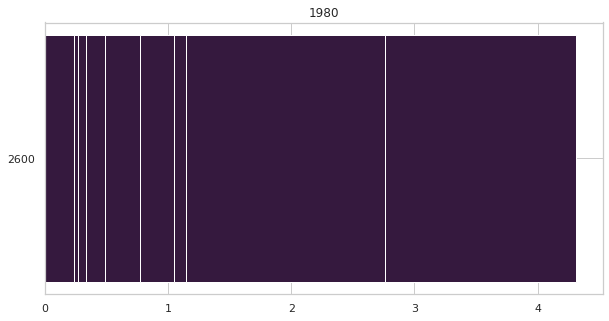

In [37]:
from matplotlib import animation
years = df.sort_values("Year")['Year'].unique()

font = {
    'weight': 'normal',
    'size'  :  40,
    'color': 'lightgray'
}

fig, ax = plt.subplots(figsize=(10, 5))
label = ax.text(0.95, 0.2, years[0],
            horizontalalignment='right',
            verticalalignment='top',
            transform=ax.transAxes,
            fontdict=font)

def update_barchart(i):
  year = years[i]
  data_temp = df.loc[df['Year'] == year, :]
  ax.clear() #cada vez que haya una iteracion se limpiar√° el grafico
  ax.barh(data_temp.Platform,data_temp.Global_Sales)
  label.set_text(year)
  ax.set_title(str(year))

animacion = animation.FuncAnimation(fig, update_barchart, frames = len(years),interval = 1000) 

In [38]:
from IPython.display import HTML
HTML(animacion.to_html5_video())

####RECORD DE VENTAS POR REGI√ìN:

#####ESTADOS UNIDOS:

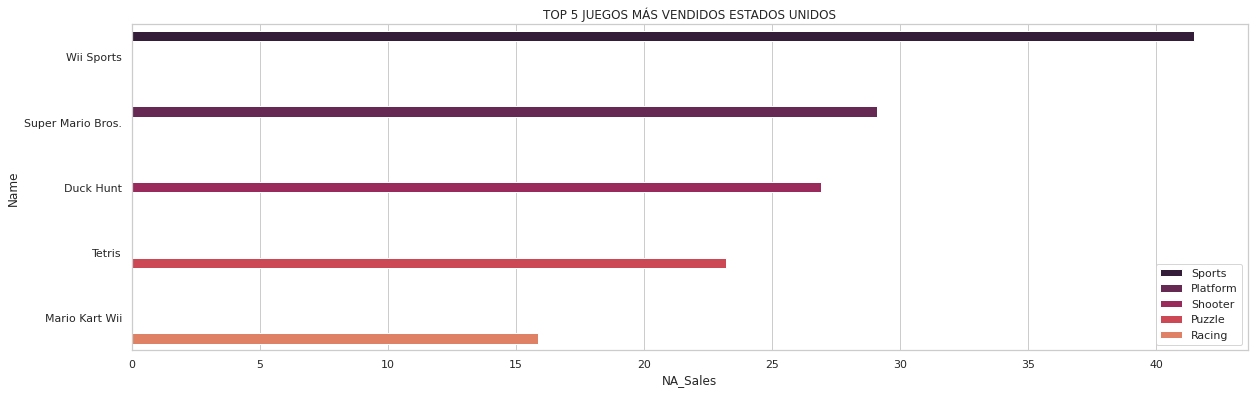

In [39]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='NA_Sales',hue='Genre',data=df.sort_values('NA_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS M√ÅS VENDIDOS ESTADOS UNIDOS')
plt.legend()

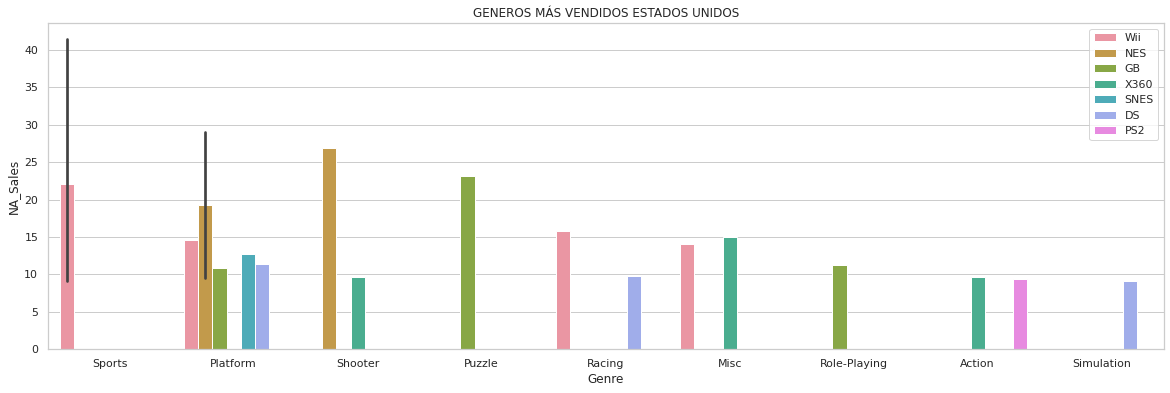

In [40]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('GENEROS M√ÅS VENDIDOS ESTADOS UNIDOS')
plt.legend()

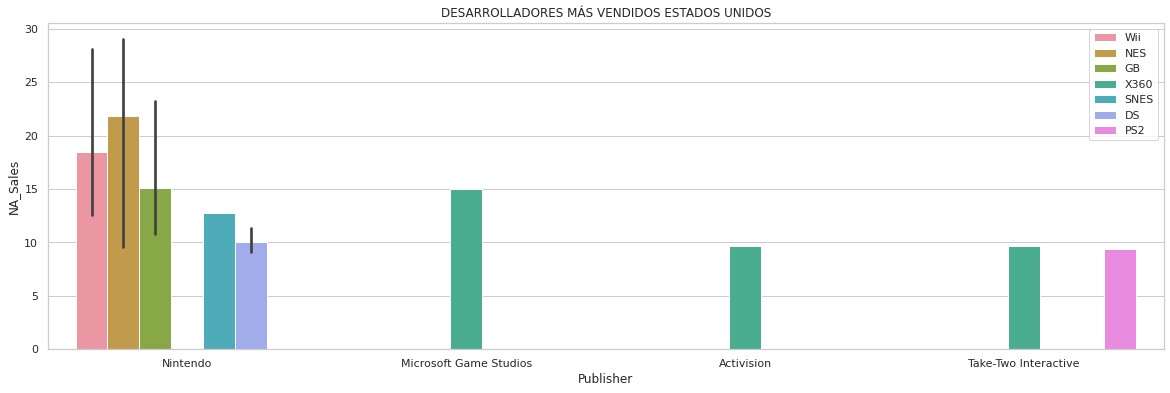

In [41]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='NA_Sales', hue='Platform',data=df.sort_values('NA_Sales', ascending=False).head(20)).set_title('DESARROLLADORES M√ÅS VENDIDOS ESTADOS UNIDOS')
plt.legend()

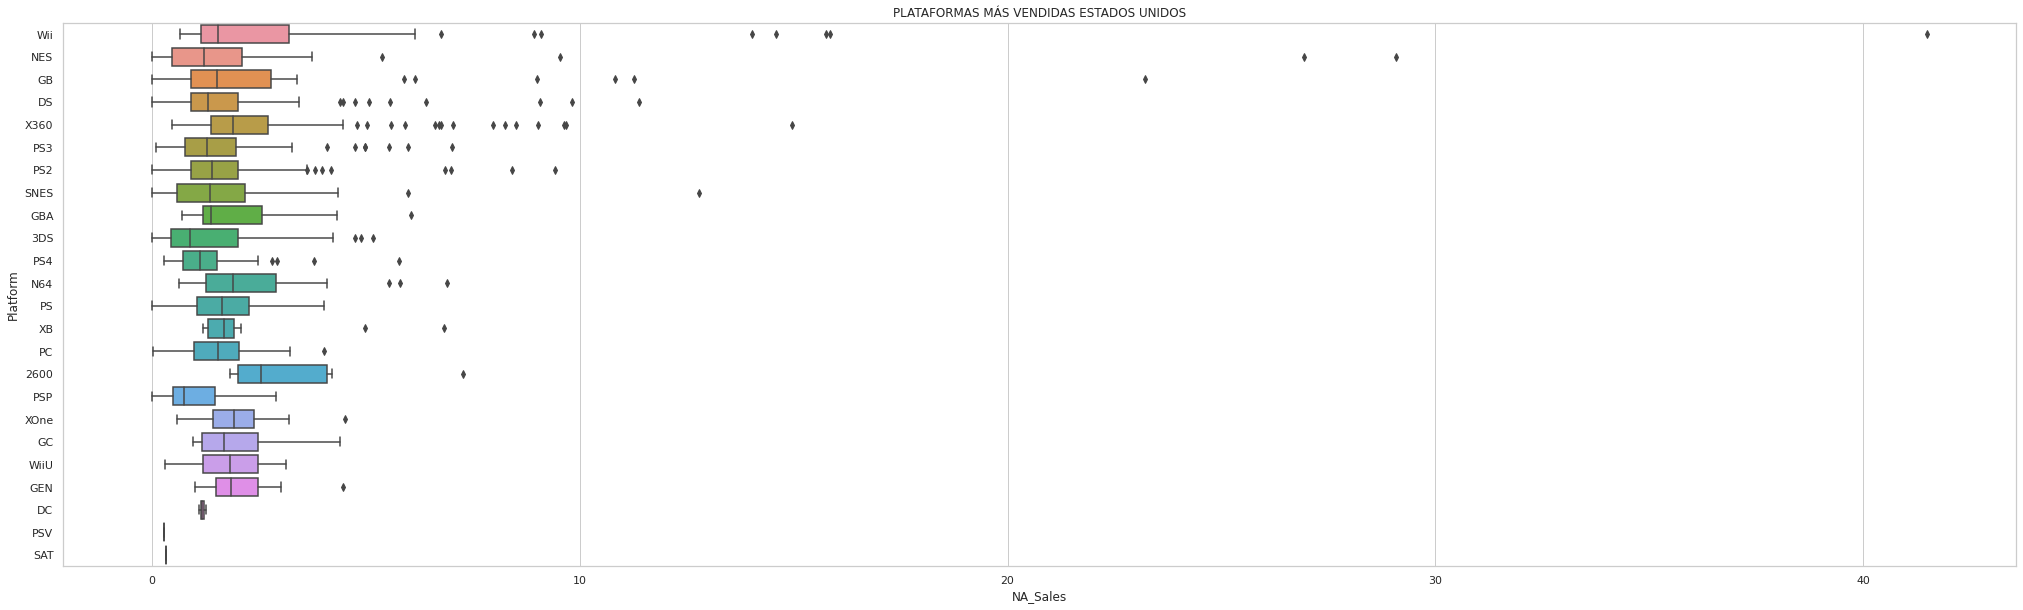

In [42]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'NA_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS M√ÅS VENDIDAS ESTADOS UNIDOS')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Estados Unidos se lo lleva el g√©nero de Deportes de la mano de Nintendo Wii, m√°s precisamente con el juego Wii Sports con m√°s de 40 millones en ventas.

Tambi√©n podemos observar que los americanos han tenido un consumo preferente por juegos y consolas de Nintendo, seguido de desarrollos propios del pa√≠s producidos por Microsoft Games y Activision, acompa√±ados por plataformas como XBox. 

Finalmente vemos que en Estados Unidos existe un consumo de juegos de g√©nero muy variado, liderando las ventas los juegos de Deporte, Plataforma y Shooter, que inclusive se ofertan para distintas consolas.

Es interesante ver que en Estados Unidos lideran los juegos y consolas japoneses, y c√≥mo los juegos de deporte y disparos tienen gran relevancia.

#####JAP√ìN:

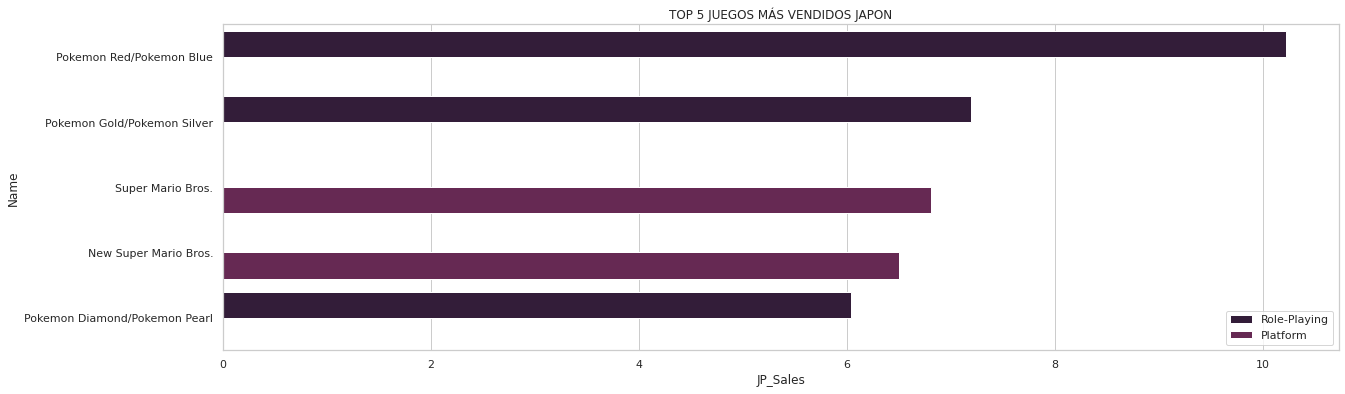

In [43]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='JP_Sales',hue='Genre',data=df.sort_values('JP_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS M√ÅS VENDIDOS JAPON')
plt.legend()

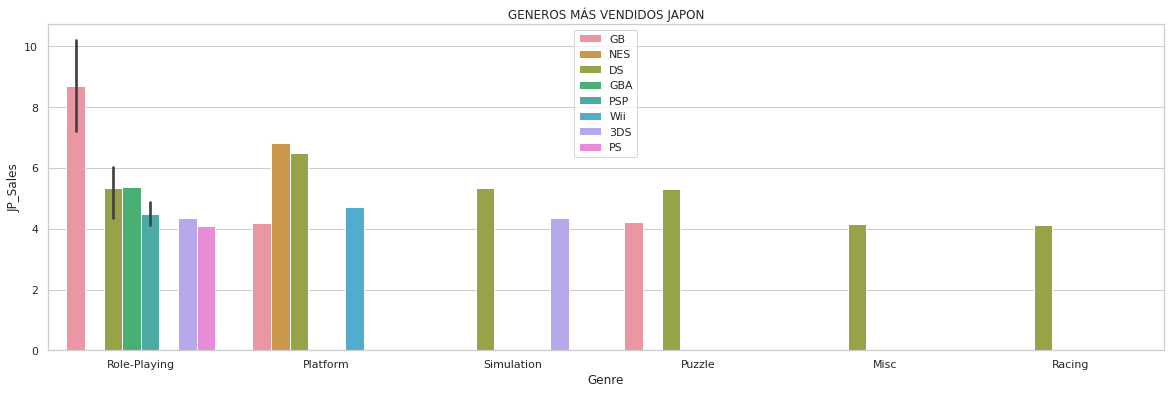

In [44]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('GENEROS M√ÅS VENDIDOS JAPON')
plt.legend()

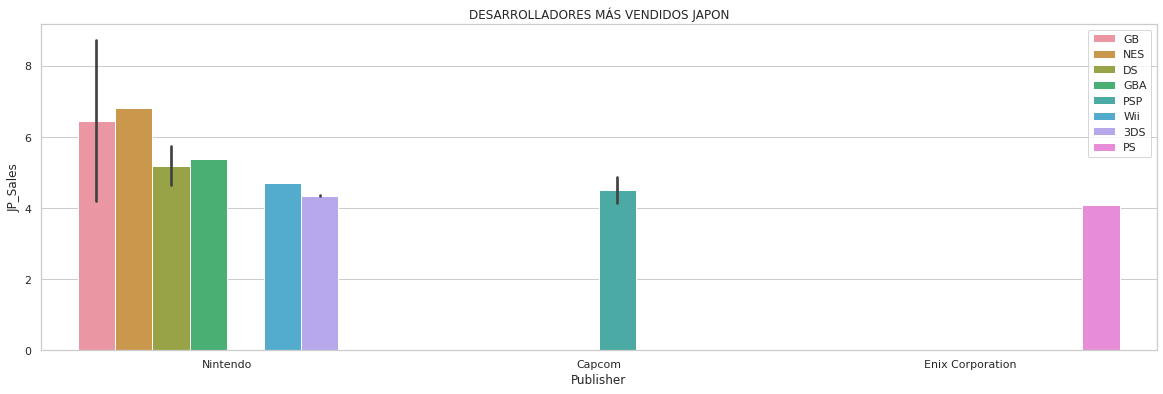

In [45]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='JP_Sales', hue='Platform',data=df.sort_values('JP_Sales', ascending=False).head(20)).set_title('DESARROLLADORES M√ÅS VENDIDOS JAPON')
plt.legend()

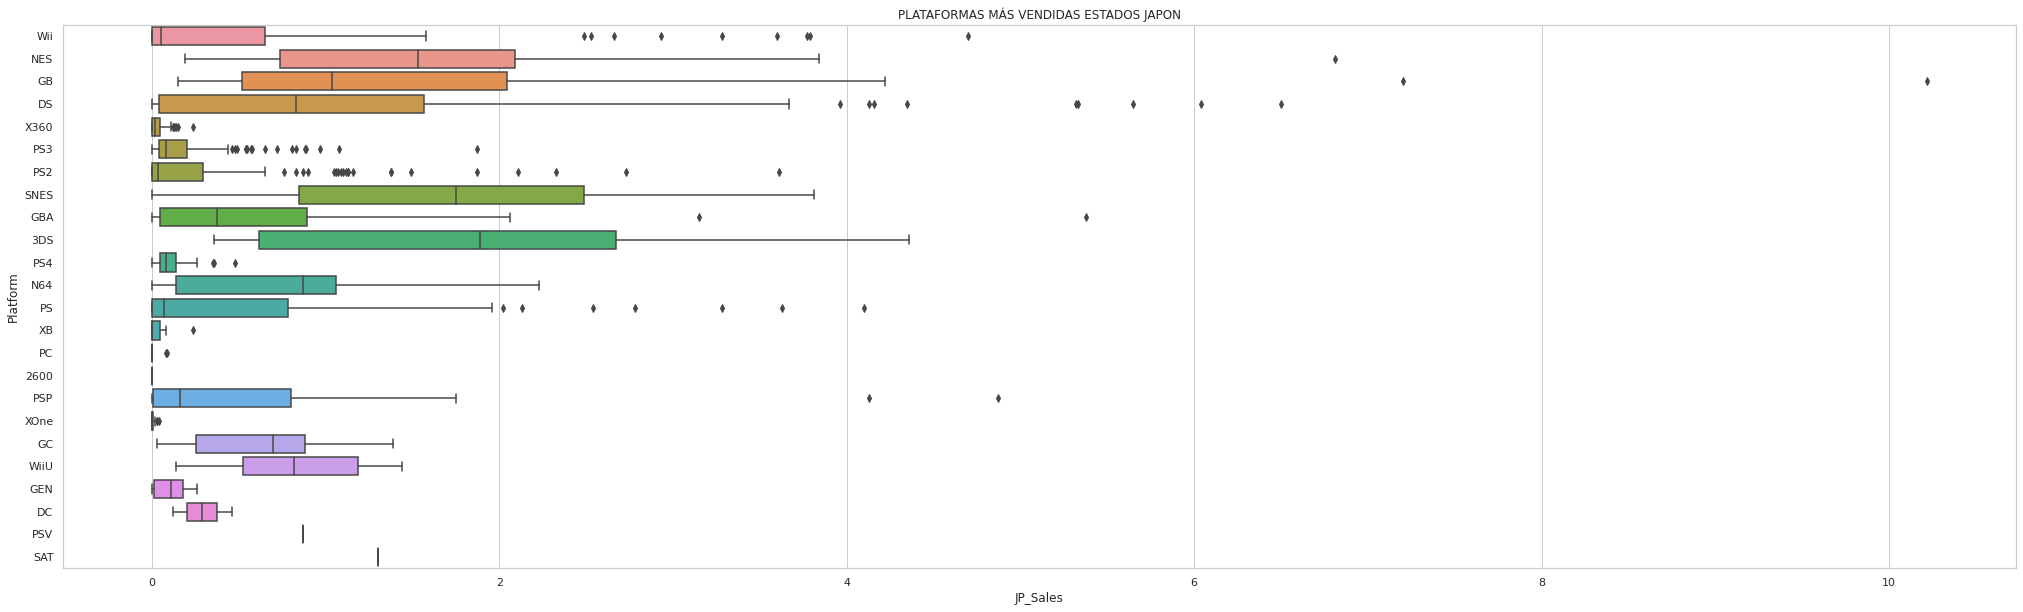

In [46]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'JP_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS M√ÅS VENDIDAS ESTADOS JAPON')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Jap√≥n se lo lleva el g√©nero de Role-Playing o RPG, m√°s precisamente con los juegos Pokemon Red y Pokemos Blue con m√°s de 10 millones en ventas.

Tambi√©n podemos observar que los japoneses han tenido un consumo preferente por juegos y consolas propios del pa√≠s, producidos por Nintendo en mayor proporsi√≥n, seguidos de otros desarrolladores como Capcom que han tenido grandes entregas como Resident Evil y Street Fighter. 

Finalmente vemos que en Jap√≥n existe un consumo de juegos de g√©nero no tan variado, liderando las ventas los juegos de RPG, para todas las consolas disponibles de Nintendo. 
Cabe destacar a la Nintendo DS, que si bien no ha superado en ventas a la Nintendo NES o a la GameBoy, ha permanecido como plataforma definitiva para g√©neros menos populares como Simulaci√≥n, Puzzle, Misc y Carreras.

Es interesante ver que en Jap√≥n lideran los juegos y consolas nacionales, notandose una menor diversidad de consumos de g√©neros, y c√≥mo las plataformas de Estados Unidos han tenido apenas relevancia con ventas de la Playstation Vita, lo cual deja en evidencia que Jap√≥n tiene preferencia por plataformas port√°tiles.

#####EUROPA:

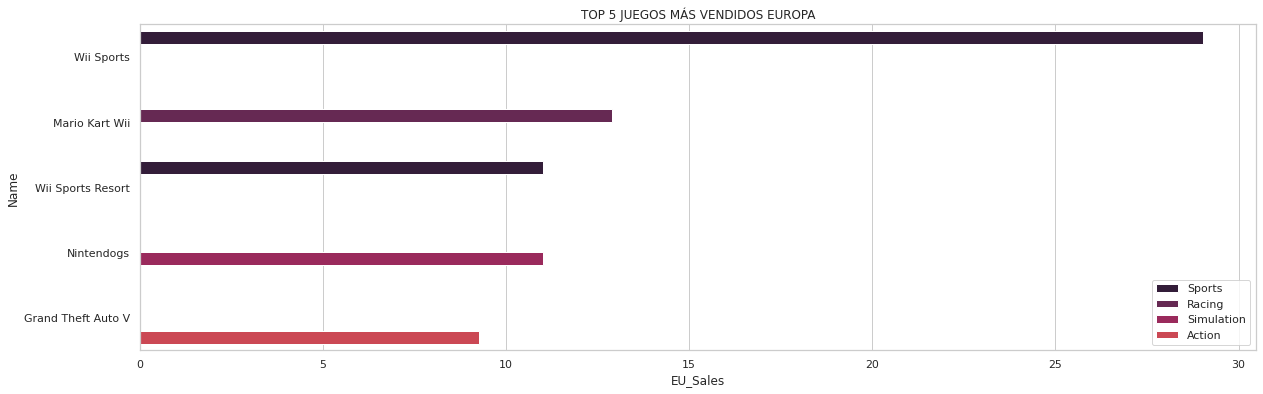

In [47]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(y='Name',x='EU_Sales',hue='Genre',data=df.sort_values('EU_Sales', ascending=False).head(5)).set_title('TOP 5 JUEGOS M√ÅS VENDIDOS EUROPA')
plt.legend()

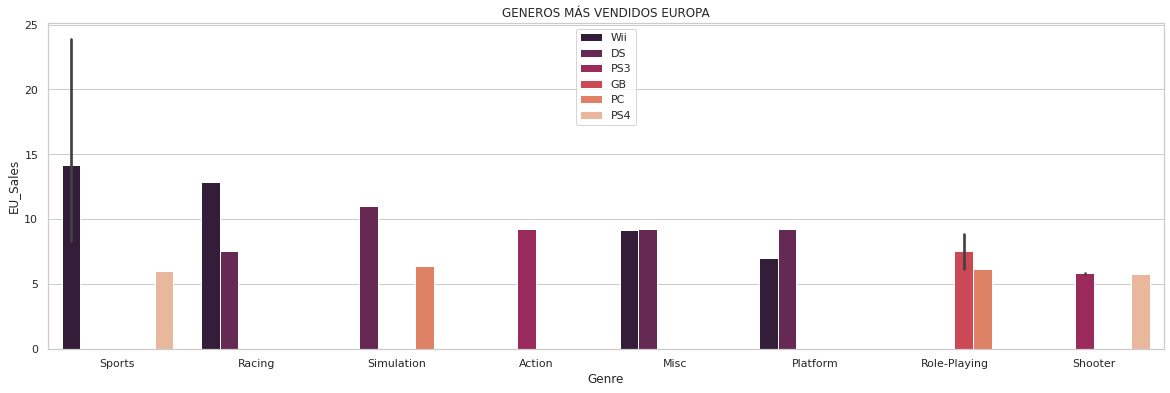

In [48]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Genre', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('GENEROS M√ÅS VENDIDOS EUROPA')
plt.legend()

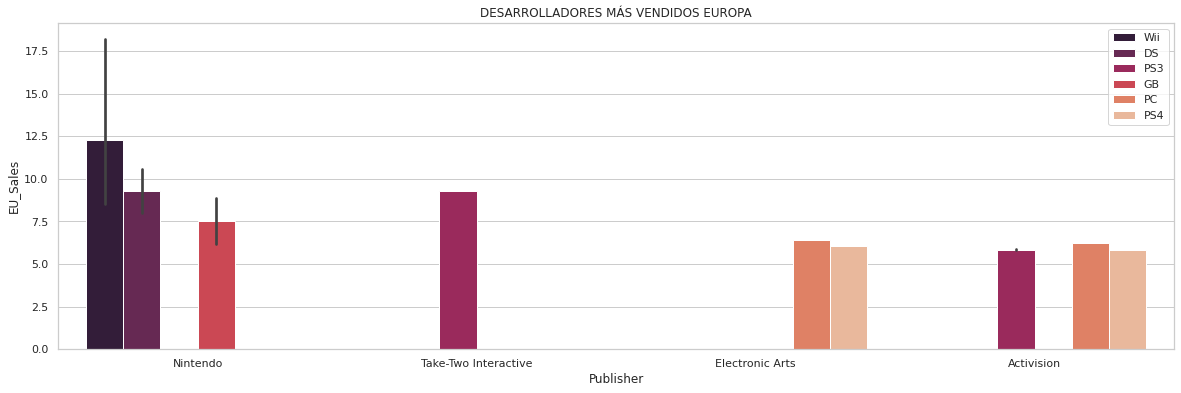

In [49]:
fig, ax = plt.subplots(figsize=(20,6))
sns.barplot(x='Publisher', y='EU_Sales', hue='Platform',data=df.sort_values('EU_Sales', ascending=False).head(20)).set_title('DESARROLLADORES M√ÅS VENDIDOS EUROPA')
plt.legend()

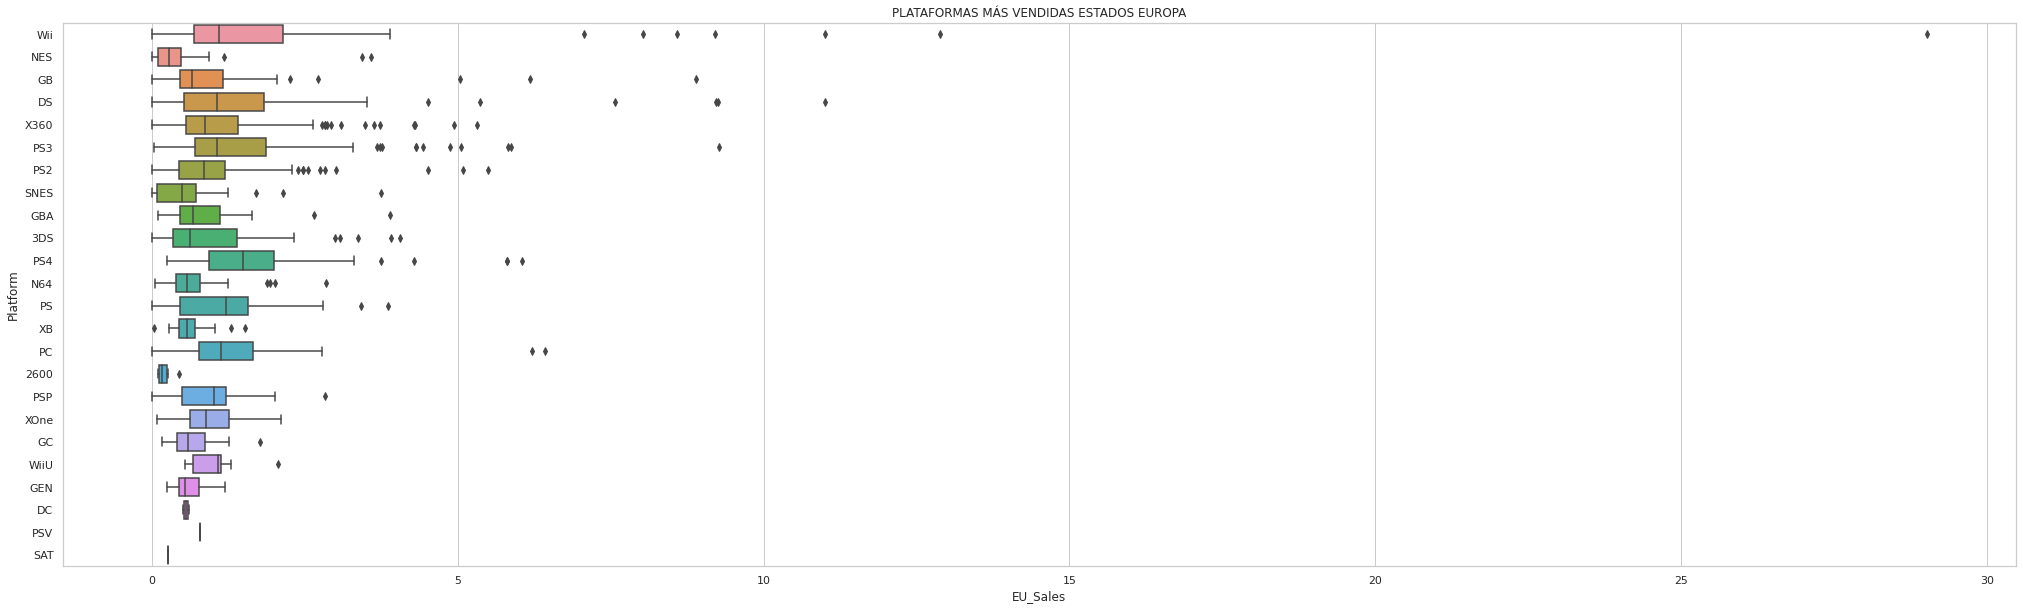

In [50]:
plt.figure(figsize=(35,10))
sns.boxplot(x = 'EU_Sales', y = 'Platform', data = df.head(1000)).set_title('PLATAFORMAS M√ÅS VENDIDAS ESTADOS EUROPA')
plt.show()

A partir de las visualizaciones anteriores podemos afirmar que el record de ventas en Europa se lo lleva el g√©nero de Deportes de la mano de Nintendo Wii, m√°s precisamente con el juego Wii Sports con casi 30 millones en ventas.

Tambi√©n podemos observar que los europeos han tenido un consumo muy parecido al de Estados Unidos, con una preferencia a juegos producidos por Nintendo en mayor proporsi√≥n, seguidos de otros desarrolladores americanos como Electronic Arts y Activision que ya hab√≠amos mencionado anteriormente. 

Finalmente vemos que en Europa existe un consumo bastante parejo de juegos, pero con g√©neros muy variado, casi como si se aceptara lo mejor de Estados Unidos y lo mejor de Jap√≥n, liderando las ventas los juegos de Deportes, Carreras, Simulaci√≥n y Acci√≥n, en donde compiten plataformas como Nintendo y Playstation.
Cabe destacar que ha aparecido la PC como plataforma de juegos, que si bien no ha superado en ventas a la Nintendo o la Playstation, ha permanecido como alternativa a las plataformas antes menciondas, gracias a la posibilidad de permitir jugar juegos de cualquier desarrollador sea de Nintendo, Sony o Microsoft.

Es interesante ver que en Europa lideran los juegos y consolas japoneses, pero a diferencia de Estados Unidos o Jap√≥n, los europeos consumen una mayor diversidad de g√©neros y plataformas, teniendo preferencia por g√©neros que tengan cierto v√≠nculo con la realidad como Deportes, Carreras y Simulaci√≥n. 